Iteration 1, loss = 0.36614135
Iteration 2, loss = 0.17130039
Iteration 3, loss = 0.12357672
Iteration 4, loss = 0.09521214
Iteration 5, loss = 0.07712246
Iteration 6, loss = 0.06364922
Iteration 7, loss = 0.05281844
Iteration 8, loss = 0.04457830
Iteration 9, loss = 0.03734683
Iteration 10, loss = 0.03196629
Iteration 11, loss = 0.02740621
Iteration 12, loss = 0.02349218
Iteration 13, loss = 0.02080454
Iteration 14, loss = 0.01724790
Iteration 15, loss = 0.01421279
Iteration 16, loss = 0.01255734
Iteration 17, loss = 0.01072005
Iteration 18, loss = 0.00871819
Iteration 19, loss = 0.00851029
Iteration 20, loss = 0.00744857
Scikit-learn MLP Test Accuracy: 0.9786
Scikit-learn Training Time: 60.44 seconds


c:\Users\parau\anaconda3\envs\tf39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


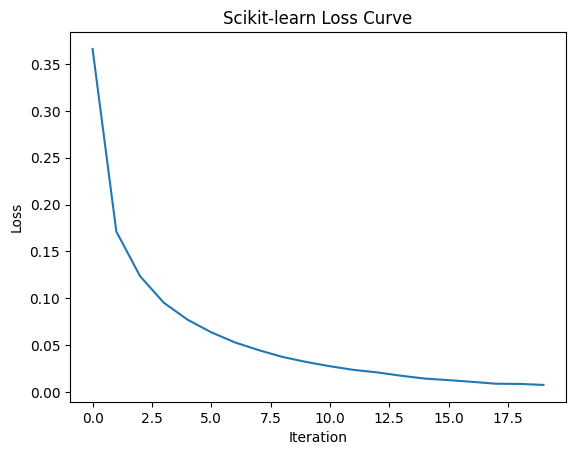

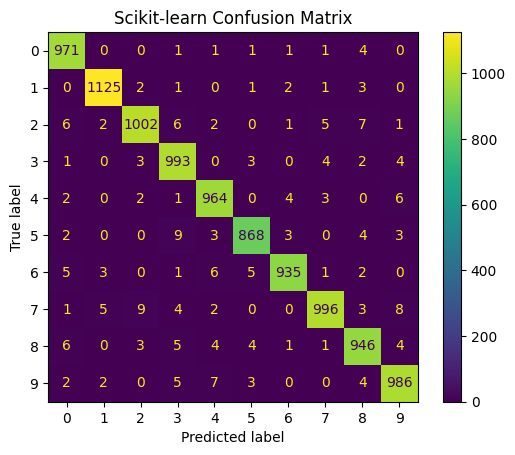

Epoch 1/20
422/422 [==============================] - 3s 4ms/step - loss: 0.3838 - accuracy: 0.8936 - val_loss: 0.1758 - val_accuracy: 0.9517
Epoch 2/20
422/422 [==============================] - 1s 3ms/step - loss: 0.1766 - accuracy: 0.9486 - val_loss: 0.1226 - val_accuracy: 0.9678
Epoch 3/20
422/422 [==============================] - 1s 3ms/step - loss: 0.1273 - accuracy: 0.9630 - val_loss: 0.1028 - val_accuracy: 0.9733
Epoch 4/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0983 - accuracy: 0.9715 - val_loss: 0.0992 - val_accuracy: 0.9718
Epoch 5/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0793 - accuracy: 0.9773 - val_loss: 0.0861 - val_accuracy: 0.9748
Epoch 6/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0648 - accuracy: 0.9819 - val_loss: 0.0854 - val_accuracy: 0.9767
Epoch 7/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0542 - accuracy: 0.9845 - val_loss: 0.0786 - val_accuracy: 0.9777
Epoch 

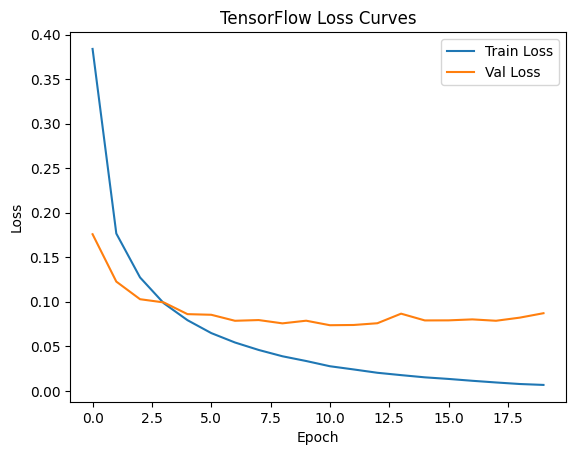

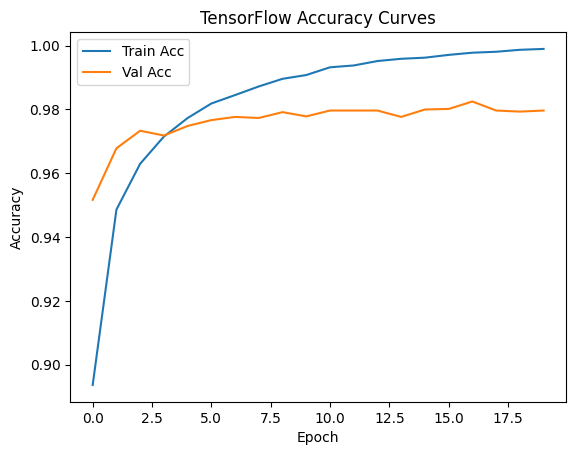

313/313 [==============================] - 1s 2ms/step


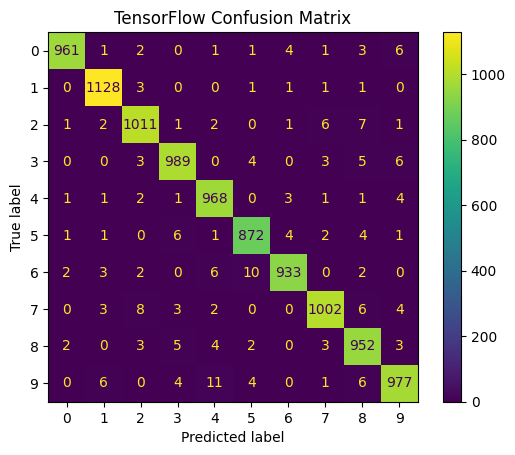

In [ ]:
### 1. Imports and Setup
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

### 2. Data Preprocessing
# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0,1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Flatten images for Scikit-learn
X_train_flat = x_train.reshape(-1, 28 * 28)
X_test_flat  = x_test.reshape(-1, 28 * 28)
### 3. Scikit-learn MLP Implementation
# Define and train the MLPClassifier
sk_clf = MLPClassifier(
    hidden_layer_sizes=(128,),
    activation='relu',
    solver='adam',
    batch_size=128,
    max_iter=20,
    random_state=42,
    verbose=True
)

start_time = time.time()
sk_clf.fit(X_train_flat, y_train)
sk_time = time.time() - start_time

# Evaluate on test set
y_pred_sk = sk_clf.predict(X_test_flat)
sk_acc = accuracy_score(y_test, y_pred_sk)
print(f"Scikit-learn MLP Test Accuracy: {sk_acc:.4f}")
print(f"Scikit-learn Training Time: {sk_time:.2f} seconds")

# Plot loss curve
plt.figure()
plt.plot(sk_clf.loss_curve_)
plt.title('Scikit-learn Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

# Confusion matrix
cm_sk = confusion_matrix(y_test, y_pred_sk)
disp_sk = ConfusionMatrixDisplay(cm_sk, display_labels=sk_clf.classes_)
disp_sk.plot(cmap='viridis')
plt.title('Scikit-learn Confusion Matrix')
plt.show()
### 4. TensorFlow MLP Implementation
# Build the Sequential model
tf_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])

tf_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train with a validation split
start_time = time.time()
history = tf_model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=20,
    batch_size=128,
    verbose=1
)
tf_time = time.time() - start_time

# Evaluate on test set
test_loss, test_acc = tf_model.evaluate(x_test, y_test, verbose=0)
print(f"TensorFlow Model Test Accuracy: {test_acc:.4f}")
print(f"TensorFlow Training Time: {tf_time:.2f} seconds")

# Plot Training & Validation Loss
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('TensorFlow Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Training & Validation Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('TensorFlow Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Confusion matrix for TensorFlow predictions
y_pred_tf = np.argmax(tf_model.predict(x_test), axis=1)
cm_tf = confusion_matrix(y_test, y_pred_tf)
disp_tf = ConfusionMatrixDisplay(cm_tf)
disp_tf.plot(cmap='viridis')
plt.title('TensorFlow Confusion Matrix')
plt.show()


**Test Accuracy**  
- Scikit-learn MLP: 0.9786
- TensorFlow MLP: 0.9793

**Training Time**  
- Scikit-learn: 60.44 seconds  
- TensorFlow: 27.01 seconds  

**Key Differences**  
- **Ease of Implementation**: Scikit-learn's `MLPClassifier` is a single class that covers data loading, training, and evaluation with minimal code; TensorFlow requires defining a model, compiling, and managing training loops, callbacks, and metrics.  
- **Flexibility**: TensorFlow excels at customization (custom layers, callbacks, complex architectures, GPU support), whereas Scikit-learn is best for straightforward, quick prototyping of standard MLPs.  
- **Performance & Scalability**: TensorFlow can leverage GPUs and distributed training for much larger models and datasets. Scikit-learn is CPU-only and may be slower for very deep or large-scale networks.  
- **Ecosystem**: TensorFlow integrates seamlessly with TensorBoard for visualization and supports exporting models for production (SavedModel, TensorFlow Lite). Scikit-learn integrates well into classical ML pipelines (Pipelines, GridSearchCV).  

**Conclusion**  
For quick experiments on small-to-medium tabular or image data, Scikit-learn's MLPClassifier offers simplicity and ease of use. For larger datasets, deep architectures, or production-grade deployments with GPU acceleration, TensorFlow is the more powerful and flexible choice.
